# Image Augmentation

### Objectives

1. Create greater set of images for training through image augmentation
2. Create plots to show data split between train, test and validation
3. Create convolutional neural network to predict/detect presence of powdery mildew in leaf images
4. Create evaluation figures to show performance of model

### Inputs
- inputs/mildew_dataset/cherry-leaves/test
- inputs/mildew_dataset/cherry-leaves/train
- inputs/mildew_dataset/cherry-leaves/validation

### Outputs
- Image Augmentation
- Image distribution plots for validation, train and test sets
- Saved trained and fitted ML model
- Learning curve plot for model performance
- Saved model evaluation pickle file
- Prediction on a random image file

## Set Directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detector/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print(current_dir)

/workspaces/mildew-detector/jupyter_notebooks


In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detector'

## Import Packages

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Input and Output Directories

Note - Check my_data_dir points to correct folder, change for resized images

In [5]:
my_data_dir = 'inputs/mildew_dataset/cherry-leaves/resized'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

print('train path', train_path)
print('validation path', val_path)
print('test path', test_path)
current_dir

train path inputs/mildew_dataset/cherry-leaves/resized/train
validation path inputs/mildew_dataset/cherry-leaves/resized/validation
test path inputs/mildew_dataset/cherry-leaves/resized/test


'/workspaces/mildew-detector'

### Note

Make sure version in below is set to correct folder

In [6]:
version = 'v3'
file_path = f'outputs/{version}'
current_dir

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set Labels

In [7]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['powdery_mildew', 'healthy']


## Set Image Shape

### Note - Check version 

In [8]:
## Import saved image shape embedding
import joblib
version = 'v3'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(100, 100, 3)

## Number of images in train, test and validation data

Note - version will be taken from cell above

/tmp/ipykernel_587/2624712217.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_freq = df_freq.append(
/tmp/ipykernel_587/2624712217.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_freq = df_freq.append(
/tmp/ipykernel_587/2624712217.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_freq = df_freq.append(
/tmp/ipykernel_587/2624712217.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_freq = df_freq.append(
/tmp/ipykernel_587/2624712217.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_freq = df_freq.append(
/tmp/ipykernel_

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images




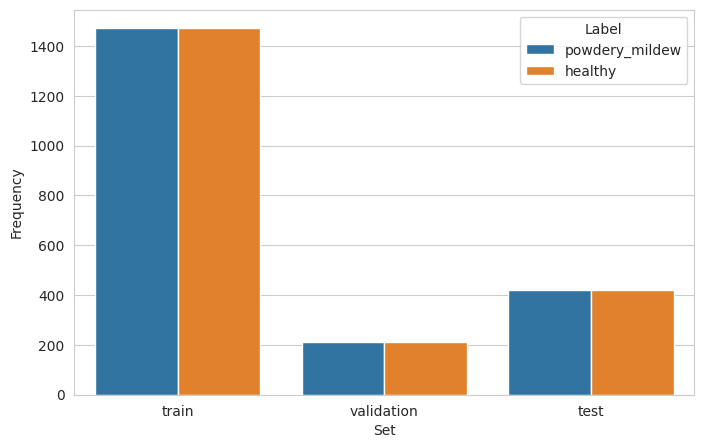

In [9]:
version
file_path = f'outputs/{version}'

df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()


### Data Split as Pie Chart

In [ ]:
def pie_chart():
    file_path = f'outputs/{version}'
    print(file_path)
    color = sns.color_palette('bright')
    x = 0

    healthy_temp = []
    mildew_temp = []
    folders = ['train', 'validation', 'test']

    for label in labels:
        
        for folder in ['train', 'validation', 'test']:

            print("folder", folder)
            if label == 'healthy':
                print("label", label)
                data = int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))
                healthy_temp.append(data)
            else:
                data = int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))
                mildew_temp.append(data)
            
        if label == 'healthy':
            plt.pie(healthy_temp, labels=folders, colors=color, autopct='%1.1f%%', shadow=True)
            plt.legend(title="Healthy Images Distribution")
            plt.savefig(f'{file_path}/healthy_labels_distribution_pie.png',
            bbox_inches='tight', dpi=150)
            plt.show()
        else:
            plt.pie(mildew_temp, labels=folders, colors=color, autopct='%1.1f%%', shadow=True)
            plt.legend(title="Powdery Mildew Images Distribution")
            plt.savefig(f'{file_path}/mildew_labels_distribution_pie.png',
            bbox_inches='tight', dpi=150)
            plt.show()
            

    print("2nd test", healthy_temp)
    print("3rd", mildew_temp)
    return healthy_temp, mildew_temp

In [ ]:
pie_chart()

## Image Data Augmentation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

#### Augment Training Images

In [12]:
batch_size = 20  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

#### Augment Validation Images

In [13]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices


Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

#### Augment Test Images

In [14]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices


Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot of Augmented Training Images

(20, 100, 100, 3)


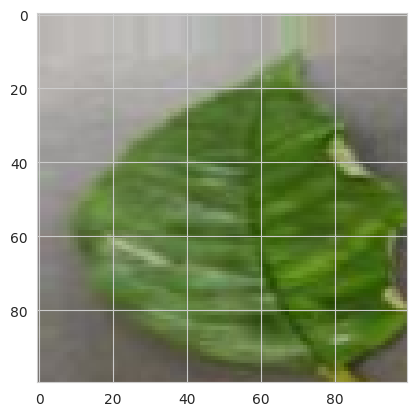

(20, 100, 100, 3)


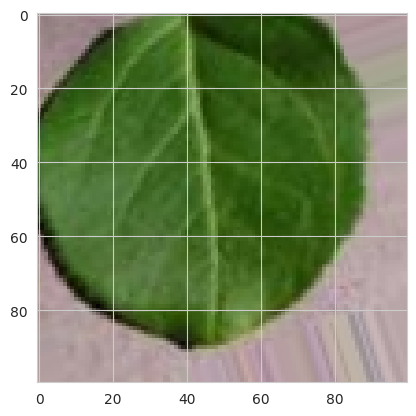

(20, 100, 100, 3)


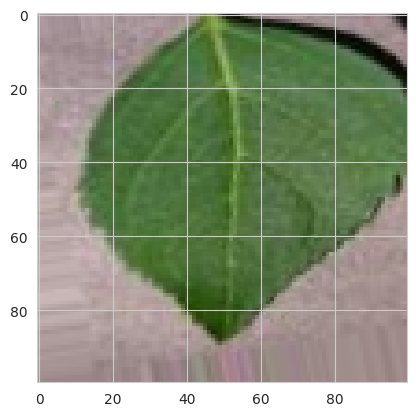

In [16]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot of Augmented Validation and Test Images

In [ ]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()


## Save class_indices

In [18]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v3/class_indices.pkl']

## Model Creation

NOTE - Check activation function in dense output layer

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [39]:
def create_tf_model():
    opt = SGD(lr=0.002)
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    return model


#### Model Summary

In [40]:
create_tf_model().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)             

/home/codeany/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


#### Early Stopping Condition

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

## Model Fitting

In [42]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )


Epoch 1/25
147/147 [==============================] - 179s 1s/step - loss: 0.7818 - accuracy: 0.5458 - val_loss: 0.5733 - val_accuracy: 0.8190
Epoch 2/25
147/147 [==============================] - 173s 1s/step - loss: 0.5427 - accuracy: 0.7264 - val_loss: 0.3544 - val_accuracy: 0.9167
Epoch 3/25
147/147 [==============================] - 174s 1s/step - loss: 0.4941 - accuracy: 0.8064 - val_loss: 0.2576 - val_accuracy: 0.9167
Epoch 4/25
147/147 [==============================] - 174s 1s/step - loss: 0.9348 - accuracy: 0.7999 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/25
147/147 [==============================] - 173s 1s/step - loss: 7.6057 - accuracy: 0.5007 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/25
113/147 [======================>.......] - ETA: 38s - loss: 7.5062 - accuracy: 0.4924

# Massive header

this is the best song ever made ever

hey yo, the weather man come to bring us sugar and tea and rum, hey yo the weather man come to bring us what we yearn for. 

In [20]:
sub = "v3.4_"

model.save(f'outputs/{version}/{sub}mildew_detector_model.h5')

## Model Performance

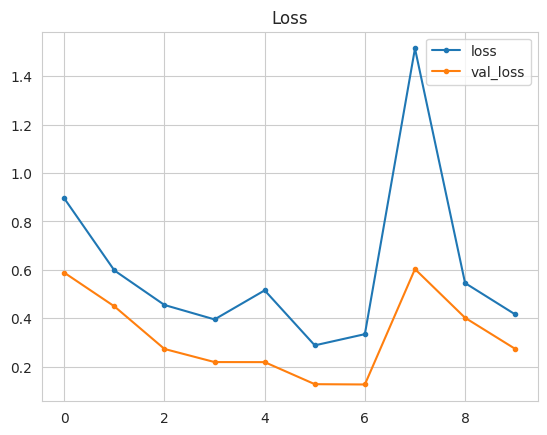

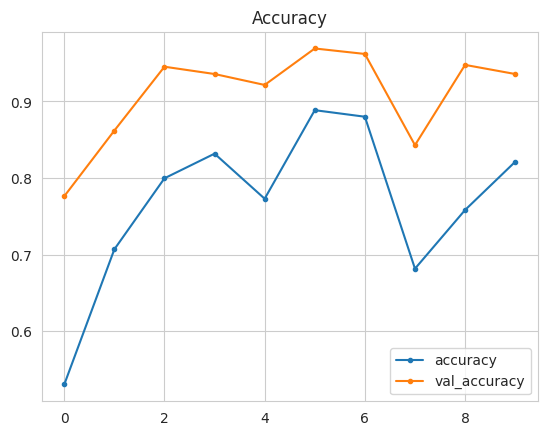

In [21]:
losses = pd.DataFrame(model.history.history)

sub = "v3.4_"

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/{sub}model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/{sub}model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()


## Model Evaluation

Check version and file path

In [22]:
from keras.models import load_model
model = load_model(f'outputs/{version}/{sub}mildew_detector_model.h5')

In [23]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 12s 270ms/step - loss: 0.2858 - accuracy: 0.9218


## Evaluation Pickle

NOTE - Double check file path below

In [24]:
joblib.dump(value=evaluation,
            filename=f"outputs/{version}/{sub}evaluation.pkl")

['outputs/v3/v3.3_evaluation.pkl']

## Predict on New Data

Image shape: (100, 100), Image mode: RGB


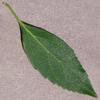

In [36]:
from tensorflow.keras.preprocessing import image

pointer = 22
label = labels[1]  # select Powdery Mildew or Healthy

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image


In [37]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 100, 100, 3)


Prediction on class probabilities

In [38]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.7169675827026367
healthy
